In [209]:
import os
import numpy as np
import pandas as pd
import IPython.display as ipd

import sklearn
import librosa
from numpy import unique
from numpy import where
from matplotlib import pyplot as plt
import librosa.display
from sklearn import metrics
%matplotlib inline

# IDEOLOGY 200 ms DATASET

## Loading the dataset

In [210]:
base_path='D:/Himani-work/gsoc2020/dataset/ideology_extra200ms/with_extra_200ms/'
base_path

'D:/Himani-work/gsoc2020/dataset/ideology_extra200ms/with_extra_200ms/'

In [211]:
audio_files=os.listdir('D:/Himani-work/gsoc2020/dataset/ideology_extra200ms/with_extra_200ms/')
len(audio_files),audio_files[0]

(2792,
 '2016-01-01_0000_US_MSNBC_Hardball_with_Chris_Matthews_clip_3024_ee__3519.38-3520.6__0.01.wav')

In [212]:
df_ideology_200ms=pd.read_csv('D:/Himani-work/gsoc2020/dataset/spreadsheet_data/ideology_results_praat_formants_extracted_with_200ms_for_R.csv',sep='\t')

In [213]:
print(df_ideology_200ms.shape)
df_ideology_200ms.head(10)

(2696, 11)


,file,f1_1,f2_1,f3_1,f1_2,f2_2,f3_2,f1_3,f2_3,f3_3,sound
0,C:\Daten\large_files_for_habil\ideology_snippe...,NaN,NaN,NaN,NaN,NaN,NaN,425.0,1460.0,2711.0,ee
1,C:\Daten\large_files_for_habil\ideology_snippe...,663.0,1610.0,2584.0,518.0,1787.0,2627.0,421.0,1905.0,2466.0,ai
2,C:\Daten\large_files_for_habil\ideology_snippe...,702.0,1380.0,2382.0,606.0,1675.0,2435.0,441.0,1876.0,2682.0,ai
3,C:\Daten\large_files_for_habil\ideology_snippe...,662.0,1542.0,2884.0,539.0,1784.0,2519.0,466.0,2036.0,2533.0,ai
4,C:\Daten\large_files_for_habil\ideology_snippe...,671.0,1377.0,2528.0,645.0,1586.0,2587.0,519.0,1802.0,2608.0,ai
5,C:\Daten\large_files_for_habil\ideology_snippe...,578.0,1366.0,2658.0,603.0,1035.0,2782.0,529.0,1519.0,2485.0,ee
6,C:\Daten\large_files_for_habil\ideology_snippe...,802.0,1496.0,2402.0,793.0,1525.0,2286.0,673.0,1677.0,2362.0,ai
7,C:\Daten\large_files_for_habil\ideology_snippe...,656.0,1461.0,2540.0,514.0,1321.0,2758.0,602.0,1378.0,2546.0,ee
8,C:\Daten\large_files_for_habil\ideology_snippe...,1024.0,1706.0,2606.0,805.0,1915.0,2636.0,728.0,2137.0,2751.0,ai
9,C:\Daten\large_files_for_habil\ideology_snippe...,710.0,1491.0,2476.0,718.0,1984.0,2273.0,589.0,1824.0,2407.0,ai


In [214]:
df_ideology_200ms['file'][0]

'C:\\Daten\\large_files_for_habil\\ideology_snippets\\wav\\with_extra_200ms\\2016-01-01_0000_US_MSNBC_Hardball_with_Chris_Matthews_clip_3024_ee__3519.38-3520.6__0.01.wav'

In [215]:
#the sound column here represents the type of pronounciation it has i.e ee and ai 
# let us see the distribution
df_ideology_200ms['sound'].value_counts()

ai    2421
ee     275
Name: sound, dtype: int64

## Audio visualization

In [216]:
#let us  listen a audio having "ee"

ipd.Audio(base_path+audio_files[7])

In [217]:
#let us  listen a audio having "ai"

ipd.Audio(base_path+audio_files[1])

In [225]:
def visualize_Audio(filename,sound,SAMPLE_RATE):
    x, sr = librosa.load(filename,sr=SAMPLE_RATE)
    #print(x,"length is ",len(x))
    #print("Sample rate is",sr)
    plt.figure(figsize=(14, 5))
    plt.title("%s sound at sample rate %s"%(sound,SAMPLE_RATE))
    librosa.display.waveplot(x, sr=sr)



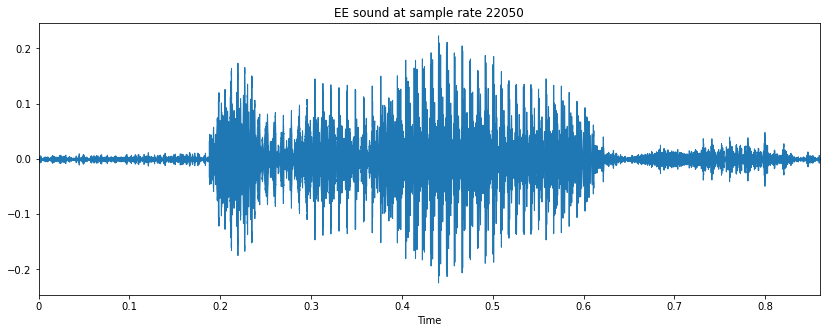

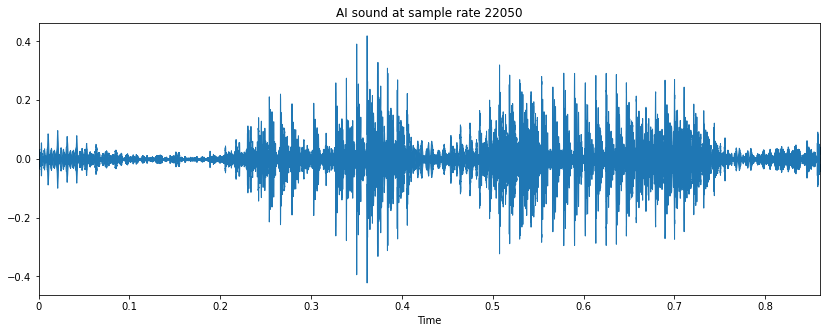

In [227]:
visualize_Audio(base_path+audio_files[7],"EE",22050)
visualize_Audio(base_path+audio_files[1],"AI",22050)

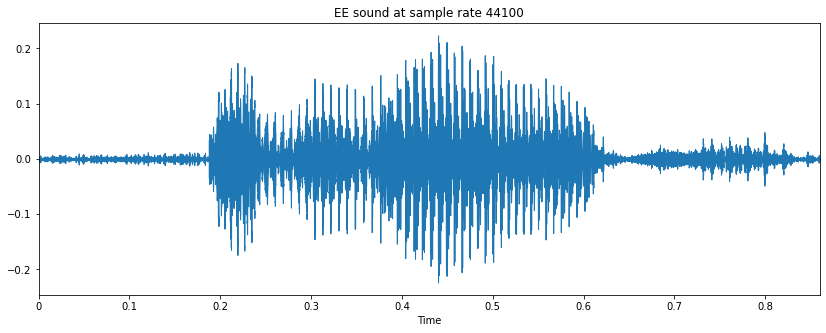

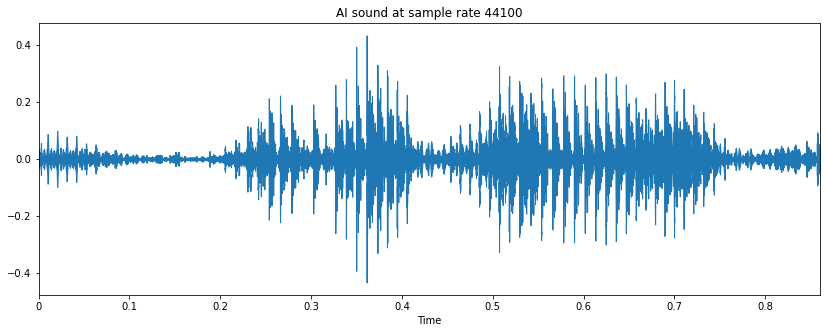

In [228]:
visualize_Audio(base_path+audio_files[7],"EE",44100)
visualize_Audio(base_path+audio_files[1],"AI",44100)


I feel that there is difference between the waveform  of "EE" and "AI" sound , however the change in the sampling rate doesnot make any significant change in the waveform

# Feature visualization

Let us visualize the features 
we will be visualizing all the features one by one 


1. MFCC

In [14]:
def plot_mfcc(filename,n_mfcc,sound,SAMPLE_RATE=44100):
    y, sr = librosa.load(filename, sr=SAMPLE_RATE) # Chop audio at 5 secs... 
    mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = n_mfcc) # 5 MFCC components

    plt.figure(figsize=(12, 6))
    plt.subplot(3,1,1)
    plt.title("MFCC is for sound %s " %sound)
    librosa.display.specshow(mfcc)
    plt.ylabel('MFCC')
    plt.colorbar()
    
    

None
None


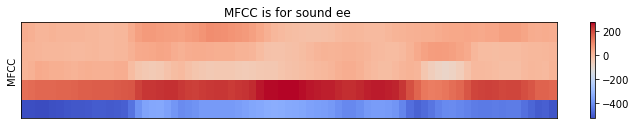

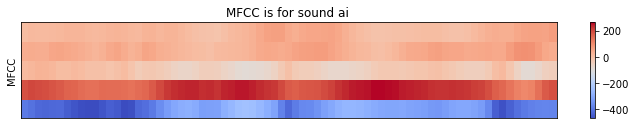

In [15]:
print(plot_mfcc(base_path+audio_files[7],5,"ee"))
print(plot_mfcc(base_path+audio_files[1],5,"ai"))


2. Log Mel-spectogram

In [16]:
def plot_LogMel(filename,n_mels,sound,SAMPLE_RATE=44100):
    y, sr = librosa.load(filename, sr=SAMPLE_RATE)
    
    melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels)
    log_S = librosa.amplitude_to_db(melspec)

    
   # Display the log mel spectrogram
    plt.figure(figsize=(12,4))
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    plt.title('Log mel spectrogram for %s'%sound)
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()


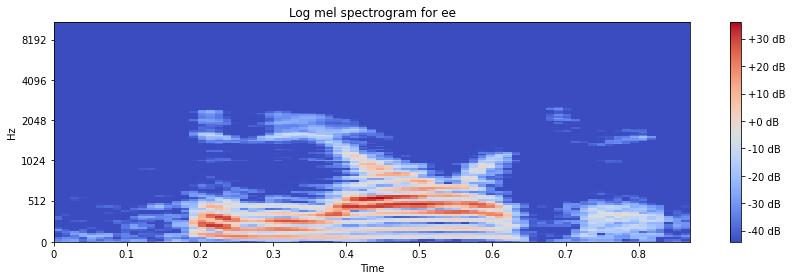

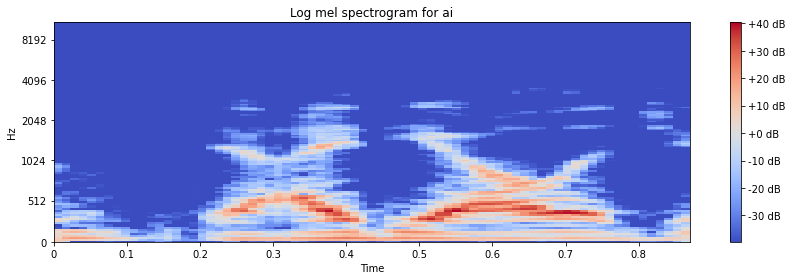

In [17]:
plot_LogMel(base_path+audio_files[7],128,"ee")
plot_LogMel(base_path+audio_files[1],128,"ai")

3 Chroma

In [18]:
def plot_chroma(filename,sound,SAMPLE_RATE=44100):
    y, sr = librosa.load(filename, sr=SAMPLE_RATE)
    
    C = librosa.feature.chroma_cqt(y=y, sr=sr)

    
   
    plt.figure(figsize=(12,4))
    # To make sure that the colors span the full range of chroma values, set vmin and vmax
    librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
    plt.title('Chromagram for the sound %s' %sound)
    plt.colorbar()
    plt.tight_layout()

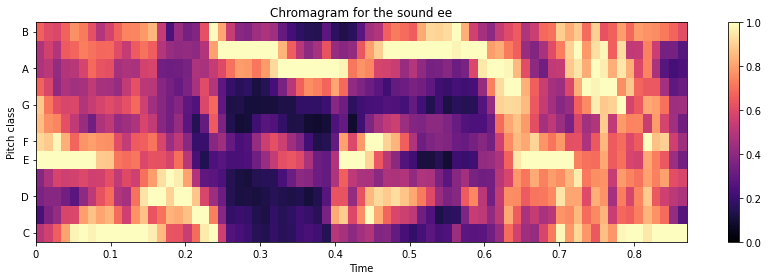

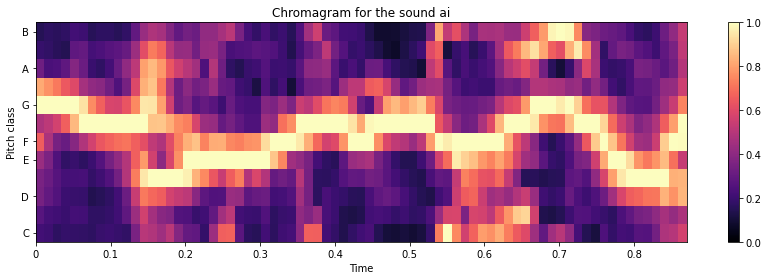

In [19]:
plot_chroma(base_path+audio_files[7],"ee")
plot_chroma(base_path+audio_files[1],"ai")

# FEATURE EXTRACTION

In [33]:
#extract the features using librosa -- trying with the mfcc features 
#check other feature classification methods 
def toFeature(file_paths):
    features=[]
    SAMPLE_RATE=44100

    for path in file_paths:
        
        try:
        
            X, sample_rate = librosa.load(os.path.join(base_path,path),sr=SAMPLE_RATE)
            sample_rate = np.array(sample_rate)
            mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=13),axis=1)
            features.append([mfccs])
            
        except:
            print("Exception is caused because of the file ",path)
            features.append([])
    return features

In [34]:
def getAllFeatures(filepaths):
    try:
        features_list=toFeature(filepaths)
        return features_list
    except Exception as e:
        
        print("this is the exception",e)
        

In [35]:
audio_features=getAllFeatures(audio_files)
len(audio_features)

c:\users\negih\appdata\local\programs\python\python38\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Exception is caused because of the file  2016-03-23_2300_US_CNN_Erin_Burnett_Out_Front_clip_2419_ai__2529.2-2530.7__0.11.wav
Exception is caused because of the file  2016-03-25_2300_US_CNN_Erin_Burnett_Out_Front_clip_2357_ai__2082.53-2083.48__0.10.wav
Exception is caused because of the file  2016-03-25_2300_US_CNN_Erin_Burnett_Out_Front_clip_2358_ai__2143.91-2145.20__0.27.wav
Exception is caused because of the file  2016-04-05_0737_US_KNBC_Late_Night_with_Seth_Myers_clip_2268_ai__2834.70-2835.65__0.06.wav
Exception is caused because of the file  2016-04-22_0737_US_KNBC_Late_Night_with_Seth_Myers_clip_2188_ai__2858.73-2859.67__0.06.wav
Exception is caused because of the file  2016-05-03_0100_US_CNN_CNN_Reports_clip_2142_ee__2953.8-2953.68__0.01.wav
Exception is caused because of the file  2016-05-05_2300_US_CNN_Erin_Burnett_Out_Front_clip_2114_ee__674.79-675.51__0.01.wav
Exception is caused because of the file  2016-06-02_2100_US_MSNBC_MTP_Daily_clip_1953_ai__1584.7-1584.66__0.01.wav
Ex

2792

# FEATURE-PREPROCESSING

In [69]:
df_features=pd.DataFrame({'file_name':audio_files,'feature':audio_features})
print(df_features.shape)
df_features

(2792, 2)


,file_name,feature
0,2016-01-01_0000_US_MSNBC_Hardball_with_Chris_M...,"[[-364.79666, 220.8041, -58.43637, 31.376398, ..."
1,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3020...,"[[-352.76138, 203.33676, -30.236895, 43.97779,..."
2,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3021...,"[[-343.22836, 203.95412, -29.40623, 30.616972,..."
3,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3022...,"[[-374.3825, 189.13422, -48.987347, 52.14913, ..."
4,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3023...,"[[-361.78595, 202.9023, -29.110424, 28.80684, ..."
...,...,...
2787,2016-12-30_1700_US_CNN_At_This_Hour_With_Berma...,"[[-371.15405, 202.55399, -43.058895, 41.54641,..."
2788,2016-12-31_0100_UK_KCET_BBC_World_News_America...,"[[-397.08026, 203.56001, -29.126291, 17.796686..."
2789,2016-12-31_0100_UK_KCET_BBC_World_News_America...,"[[-394.27136, 193.57892, -36.45861, 5.2255554,..."
2790,2016-12-31_1100_US_FOX-News_FOX_and_Friends_Sa...,"[[-402.27423, 205.92395, -41.958008, -23.28755..."


In [70]:
files=df_ideology_200ms['file'].str.split("\\",expand=True)
correct_Audio_files=list(files[6])
len(correct_Audio_files)

2696

In [74]:
df_features=df_features[df_features['file_name'].isin(correct_Audio_files)]
df_features.reset_index(drop=True,inplace=True)
df_features.shape

(2696, 2)

In [75]:
df_features.head(2)

,file_name,feature
0,2016-01-01_0000_US_MSNBC_Hardball_with_Chris_M...,"[[-364.79666, 220.8041, -58.43637, 31.376398, ..."
1,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3020...,"[[-352.76138, 203.33676, -30.236895, 43.97779,..."


In [92]:
splited_df=df_features['file_name'].str.split("clip_",expand=True)
labels=splited_df[1].str.split("_",expand=True)
audio_labels=labels[1]
audio_labels

0       ee
1       ai
2       ai
3       ai
4       ai
        ..
2691    ee
2692    ai
2693    ai
2694    ai
2695    ai
Name: 1, Length: 2696, dtype: object

In [76]:
f=pd.DataFrame(df_features['feature'].values.tolist(),columns=['feature'])
f.head(2)

,feature
0,"[-364.79666, 220.8041, -58.43637, 31.376398, 3..."
1,"[-352.76138, 203.33676, -30.236895, 43.97779, ..."


In [93]:
df_final_Audio=pd.DataFrame(f['feature'].values.tolist())
df_final_Audio.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-364.796661,220.804092,-58.436371,31.376398,34.874840,-14.109470,12.015115,-7.687247,-8.696847,2.249186,-14.229529,-0.554297,-3.002048
1,-352.761383,203.336761,-30.236895,43.977791,24.934786,-18.391037,14.911691,-9.976477,-10.702566,6.850481,-9.558990,1.030373,0.699022


In [94]:
df_final_Audio.shape

(2696, 13)

# CLUSTERING MODEL


In [171]:
train_data=df_final_Audio.to_numpy()
train_data.shape,df_final_Audio.shape

((2696, 13), (2696, 13))

In [172]:
mean = np.mean(train_data, axis=0)
std = np.std(train_data, axis=0)

train_data = (train_data - mean)/std


# K-MEAN CLUSTERING

In [173]:
def kmeans_model(train_data):
    kmean=sklearn.cluster.KMeans(n_clusters=2,n_jobs=4,max_iter=1000000)
    kmean.fit(train_data)
    # assign a cluster to each example
    yhat = kmean.predict(train_data)
    # retrieve unique clusters
    clusters = unique(yhat)
    return yhat,clusters
    
    


In [174]:
def pred_cluster_label(yhat,clusters,cluster_df,column_name):
    
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        row_ids=row_ix[0].tolist()
        cluster_df.loc[cluster_df.index.isin(row_ids),column_name]=cluster
    
    return cluster_df


In [175]:
cluster_df=pd.DataFrame()
cluster_df['audio_file']=df_features['file_name']
cluster_df['actual_label']=list(audio_labels)

cluster_df['actual_label_encode']=1
cluster_df.loc[cluster_df['actual_label']=='ee','actual_label_encode']=0
cluster_df.loc[cluster_df['actual_label']=='ai','actual_label_encode']=1

cluster_df['cluster_label_kmeans']=0
cluster_df.head(2)

,audio_file,actual_label,actual_label_encode,cluster_label_kmeans
0,2016-01-01_0000_US_MSNBC_Hardball_with_Chris_M...,ee,0,0
1,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3020...,ai,1,0


In [176]:
yhat,clusters=kmeans_model(train_data)
cluster_df=pred_cluster_label(yhat,clusters,cluster_df,'cluster_label_kmeans')
cluster_df.head(10)


c:\users\negih\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


,audio_file,actual_label,actual_label_encode,cluster_label_kmeans
0,2016-01-01_0000_US_MSNBC_Hardball_with_Chris_M...,ee,0,1
1,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3020...,ai,1,1
2,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3021...,ai,1,1
3,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3022...,ai,1,1
4,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3023...,ai,1,0
5,2016-01-01_0735_US_KCBS_Late_Show_with_Stephen...,ee,0,1
6,2016-01-01_1700_US_CNN_Legal_View_With_Ashleig...,ai,1,1
7,2016-01-01_1700_US_CNN_Legal_View_With_Ashleig...,ee,0,0
8,2016-01-02_0000_US_FOX-News_On_the_Record_with...,ai,1,0
9,2016-01-02_0100_US_CNN_Anderson_Cooper_360_cli...,ai,1,1


### Evaluation

In [200]:
def evaluation_Score(y_true,y_pred):

    print("Adjusted Rank Index",metrics.adjusted_rand_score(y_true,y_pred))
    print("Mutual information based score",metrics.adjusted_mutual_info_score(y_true,y_pred))
    print("Homogeneity",metrics.homogeneity_score(y_true,y_pred))
    print("Completeness",metrics.completeness_score(y_true,y_pred))
    print("V-measure",metrics.v_measure_score(y_true,y_pred))
    print("Fowlkes-Mallows scores",metrics.fowlkes_mallows_score(y_true,y_pred))

In [232]:
print("K-means results")
evaluation_Score(cluster_df['actual_label_encode'],cluster_df['cluster_label_kmeans'])


K-means results
Adjusted Rank Index -0.0003200040929679821
Mutual information based score -0.000360723566995925
Homogeneity 6.671785328691392e-06
Completeness 3.19068876152353e-06
V-measure 4.31688646739741e-06
Fowlkes-Mallows scores 0.641493390252413


# Agglomerative Clustering


In [202]:
def agglomerative_model(train_data):
    agg=sklearn.cluster.AgglomerativeClustering(n_clusters=2)
    agg.fit(train_data)
    # assign a cluster to each example
    yhat = agg.fit_predict(train_data)
    # retrieve unique clusters
    clusters = unique(yhat)
    return yhat,clusters

In [203]:
yhat,clusters=agglomerative_model(train_data)
print("unique clusters found are ",unique(yhat))
cluster_df['cluster_label_agg']=0
cluster_df=pred_cluster_label(yhat,clusters,cluster_df,'cluster_label_agg')
cluster_df.head(10)


unique clusters found are  [0 1]


,audio_file,actual_label,actual_label_encode,cluster_label_kmeans,cluster_label_agg,cluster_label_birch
0,2016-01-01_0000_US_MSNBC_Hardball_with_Chris_M...,ee,0,1,1,1
1,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3020...,ai,1,1,0,0
2,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3021...,ai,1,1,0,0
3,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3022...,ai,1,1,0,0
4,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3023...,ai,1,0,1,1
5,2016-01-01_0735_US_KCBS_Late_Show_with_Stephen...,ee,0,1,0,0
6,2016-01-01_1700_US_CNN_Legal_View_With_Ashleig...,ai,1,1,0,1
7,2016-01-01_1700_US_CNN_Legal_View_With_Ashleig...,ee,0,0,1,1
8,2016-01-02_0000_US_FOX-News_On_the_Record_with...,ai,1,0,1,1
9,2016-01-02_0100_US_CNN_Anderson_Cooper_360_cli...,ai,1,1,0,0


In [204]:
print(" Agglomerative Clustering results")
evaluation_Score(cluster_df['actual_label_encode'],cluster_df['cluster_label_agg'])

 Agglomerative Clustering results
Adjusted Rank Index 0.0023282311332966095
Mutual information based score -0.000250102825961968
Homogeneity 0.00018570041093899696
Completeness 9.163420650093099e-05
V-measure 0.00012271464673520356
Fowlkes-Mallows scores 0.6557319346573028


# BIRCH

In [205]:
def birch_model(train_data):
    birch=sklearn.cluster.Birch(threshold=0.01, n_clusters=2)
    birch.fit(train_data)
    # assign a cluster to each example
    yhat = birch.fit_predict(train_data)
    # retrieve unique clusters
    clusters = unique(yhat)
    return yhat,clusters

In [206]:
yhat,clusters=birch_model(train_data)
print("unique clusters found are ",unique(yhat))
cluster_df['cluster_label_birch']=0
cluster_df=pred_cluster_label(yhat,clusters,cluster_df,'cluster_label_birch')
cluster_df.head(10)


unique clusters found are  [0 1]


,audio_file,actual_label,actual_label_encode,cluster_label_kmeans,cluster_label_agg,cluster_label_birch
0,2016-01-01_0000_US_MSNBC_Hardball_with_Chris_M...,ee,0,1,1,1
1,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3020...,ai,1,1,0,0
2,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3021...,ai,1,1,0,0
3,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3022...,ai,1,1,0,0
4,2016-01-01_0700_US_KOCE_Tavis_Smiley_clip_3023...,ai,1,0,1,1
5,2016-01-01_0735_US_KCBS_Late_Show_with_Stephen...,ee,0,1,0,0
6,2016-01-01_1700_US_CNN_Legal_View_With_Ashleig...,ai,1,1,0,1
7,2016-01-01_1700_US_CNN_Legal_View_With_Ashleig...,ee,0,0,1,1
8,2016-01-02_0000_US_FOX-News_On_the_Record_with...,ai,1,0,1,1
9,2016-01-02_0100_US_CNN_Anderson_Cooper_360_cli...,ai,1,1,0,0


In [207]:
print("Birch  Clustering results")
evaluation_Score(cluster_df['actual_label_encode'],cluster_df['cluster_label_birch'])

Birch  Clustering results
Adjusted Rank Index 0.0015732604220490684
Mutual information based score 0.0008733307797689758
Homogeneity 0.001917947063918864
Completeness 0.0009124948772259939
V-measure 0.0012366385935538473
Fowlkes-Mallows scores 0.6399550345708053


# DBSCAN

In [197]:
mean_ecd=np.mean(train_data.mean())
print('Mean Euclidean Distance: '+str(mean_ecd))

Mean Euclidean Distance: -5.1899948743034025e-17


In [208]:
all_eps=np.arange(5,15,0.1)
for i in all_eps:
    dbscan=sklearn.cluster.DBSCAN(eps=i)
    dbscan.fit(train_data)
    labels=dbscan.labels_
    n_outlier=np.sum(labels==-1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print('EPS: '+str(i)+'\tNo of outlier: '+str(n_outlier)+'\tNo of cluster: '+str(n_clusters))

EPS: 5.0	No of outlier: 0	No of cluster: 1
EPS: 5.1	No of outlier: 0	No of cluster: 1
EPS: 5.199999999999999	No of outlier: 0	No of cluster: 1
EPS: 5.299999999999999	No of outlier: 0	No of cluster: 1
EPS: 5.399999999999999	No of outlier: 0	No of cluster: 1
EPS: 5.499999999999998	No of outlier: 0	No of cluster: 1
EPS: 5.599999999999998	No of outlier: 0	No of cluster: 1
EPS: 5.6999999999999975	No of outlier: 0	No of cluster: 1
EPS: 5.799999999999997	No of outlier: 0	No of cluster: 1
EPS: 5.899999999999997	No of outlier: 0	No of cluster: 1
EPS: 5.9999999999999964	No of outlier: 0	No of cluster: 1
EPS: 6.099999999999996	No of outlier: 0	No of cluster: 1
EPS: 6.199999999999996	No of outlier: 0	No of cluster: 1
EPS: 6.299999999999995	No of outlier: 0	No of cluster: 1
EPS: 6.399999999999995	No of outlier: 0	No of cluster: 1
EPS: 6.499999999999995	No of outlier: 0	No of cluster: 1
EPS: 6.599999999999994	No of outlier: 0	No of cluster: 1
EPS: 6.699999999999994	No of outlier: 0	No of cluster: 1
